In [8]:
import pandas as pd
import numpy as np

In [9]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
X = pd.read_csv("oasis_longitudinal.csv")
X

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [13]:
X.columns.values

array(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F',
       'Hand', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype=object)

In [14]:
X.shape

(373, 15)

In [15]:
# prikaz skupa za treniranje
X.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


Subject ID: Identifikator ispitanika u istraživanju.
MRI ID: Identifikator MRI snimke.
Group: Kategorizacija ispitanika u određenu grupu (demented, nondemented).
Visit: Redni broj posjeta za MRI snimku (npr. 1. posjet, 2. posjet itd.).
MR Delay: Vremensko kašnjenje između datuma snimanja i datuma kliničke procjene.
M/F: Spol ispitanika (Muško/Žensko).
Hand: Dominantna ruka ispitanika (Desna/Lijeva).
Age: Dob ispitanika.
EDUC: Razina obrazovanja is, godine obrazovanjapitanika.
SES: Socijalno-ekonomski status ispitanika.
MMSE: Rezultat Mini-Mentalnog Testiranja, koji mjeri kognitivne funkcije.
CDR: Klinička ocjena demencije, koja mjeri težinu demencije.
eTIV: Procijenjeni ukupni intrakranijalni volumen.
nWBV: Normalizirani volumen cijelog mozga.
ASF: Faktor skaliranja atlasa.iranja atlasa.


Ključne Karakteristike:

Dobni Raspon: Od 60 do 96 godina
Sesije Snimanja: 373
MRI Snimki po Ispitaniku: 3 ili 4 pojedinačne T1-težinske MRI snimke po sesiji
Desnorukost: Svi ispitanici su desnoruki
Spol: Uključeni su muškarci i žene

Klasifikacija Demencije:

72 ispitanika konzistentno je klasifinedementano nenaljude tijekom cijelog istraživanja.
64 ispitanika su inicijalno klasificirani kao dementni i ostali su takvi u kasnijim snimanjima. Među njima, 51 osoba je imalo blagu do umjerenu Alzheimerovu bolest.
14 ispitanika su inicijalno klasinedementankao nenaljude, ali su kasnije klasificirani kao dementni u kasnijim posjetima.

In [16]:
X.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [17]:
X.nunique()

Subject ID    150
MRI ID        373
Group           3
Visit           5
MR Delay      201
M/F             2
Hand            1
Age            39
EDUC           12
SES             5
MMSE           18
CDR             4
eTIV          286
nWBV          136
ASF           265
dtype: int64

Vidimo da je MRI ID monotoni atribut i da od njega ne saznajemo nikakve korisne informacije za naš rad.

In [18]:
X.drop(('MRI ID'), axis=1, inplace=True)

In [19]:
data_info = X.dtypes.to_frame(name='Data Type').join(X.describe().T)
data_info

,Data Type,count,mean,std,min,25%,50%,75%,max
Subject ID,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Group,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Visit,int64,373.0,1.882038,0.922843,1.000,1.000,2.000,2.000,5.000
MR Delay,int64,373.0,595.104558,635.485118,0.000,0.000,552.000,873.000,2639.000
M/F,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hand,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,int64,373.0,77.013405,7.640957,60.000,71.000,77.000,82.000,98.000
EDUC,int64,373.0,14.597855,2.876339,6.000,12.000,15.000,16.000,23.000
SES,float64,354.0,2.460452,1.134005,1.000,2.000,2.000,3.000,5.000
MMSE,float64,371.0,27.342318,3.683244,4.000,27.000,29.000,30.000,30.000


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   Group       373 non-null    object 
 2   Visit       373 non-null    int64  
 3   MR Delay    373 non-null    int64  
 4   M/F         373 non-null    object 
 5   Hand        373 non-null    object 
 6   Age         373 non-null    int64  
 7   EDUC        373 non-null    int64  
 8   SES         354 non-null    float64
 9   MMSE        371 non-null    float64
 10  CDR         373 non-null    float64
 11  eTIV        373 non-null    int64  
 12  nWBV        373 non-null    float64
 13  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(4)
memory usage: 40.9+ KB


NEDOSTAJUĆI PODACI

In [21]:
X.isna().sum()

Subject ID     0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

Ovjde vidimo da imamo problem s nedostajućim podacima. Varijable SES i MMSE imaju null vrijednosti. 
Za varijablu SES odabrala sam zamjenu sa srednjom vrijednošću. Iizbacivanje tih zapisa nije opcija jer gubimo previše podatak.)Za varijablu MMSE sam odabrala u potpunosti izbaciti te zapise iz skupa podataka, jer ih je dovoljno malo da ne poremete moje podatke.ežbe

In [22]:
# ubaci srednju vrijednost godina tamo gdje nedostaje ta informacija
X.loc[X.SES.isna(),'SES'] = X.loc[:,'SES'].mean()

# izbaci zapise s nedostajućom vrijednosti značajke MMSE
X = X.loc[X.MMSE.notnull(), :]

In [23]:
X.isna().sum()

Subject ID    0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

Sada vidimo da nema null vrijednosti.

STRŠEĆI PODACI

In [24]:
X.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,1.878706,593.876011,77.018868,14.611860,2.460452,27.342318,0.287062,1489.876011,0.729526,1.193776
std,0.923480,636.636500,7.660864,2.877737,1.107647,3.683244,0.371912,174.990473,0.037229,0.136533
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1358.500000,0.700000,1.098500
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1471.000000,0.729000,1.193000
75%,2.000000,869.500000,82.000000,16.000000,3.000000,30.000000,0.500000,1598.000000,0.756000,1.292000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


Pogledajmo dodatno značajku MR Delay.

In [25]:
print('MR Delay > 500: ', (X['MR Delay'] > 500).sum())
print('MR Delay > 800: ', (X['MR Delay'] > 800).sum())
print('MR Delay > 1000: ', (X['MR Delay'] > 1000).sum())
print('MR Delay > 1500: ', (X['MR Delay'] > 1500).sum())
print('MR Delay > 2000: ', (X['MR Delay'] > 2000).sum())
print('MR Delay > 2500: ', (X['MR Delay'] > 2500).sum())

MR Delay > 500:  194
MR Delay > 800:  105
MR Delay > 1000:  86
MR Delay > 1500:  43
MR Delay > 2000:  13
MR Delay > 2500:  3


In [26]:
X.loc[X['MR Delay'] > 2500, 'MR Delay']

75     2508
160    2517
265    2639
Name: MR Delay, dtype: int64

Ovo su vrijednosti koje se mogu uzeti kao stršeće vrijednosti.

NEKONZISTENTNI PODACI

In [27]:
hand_values = X['Hand'].unique()
print('Vrijednosti u stupcu Hand:', hand_values)


Vrijednosti u stupcu Hand: ['R']


In [28]:
gender_values = X['M/F'].unique()
print('Vrijednosti u stupcu M/F:', gender_values)


Vrijednosti u stupcu M/F: ['M' 'F']


To znači da vjerojatno nema nekonzistetnih podataka.

VIZUALIZACIJA PODATAKA

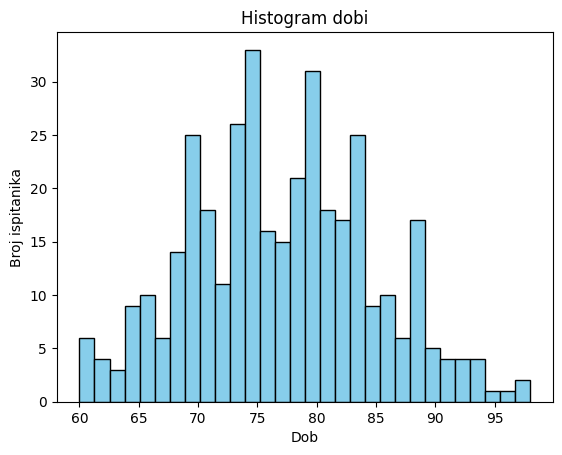

In [29]:
plt.hist(X['Age'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Dob')
plt.ylabel('Broj ispitanika')
plt.title('Histogram dobi')
plt.show()

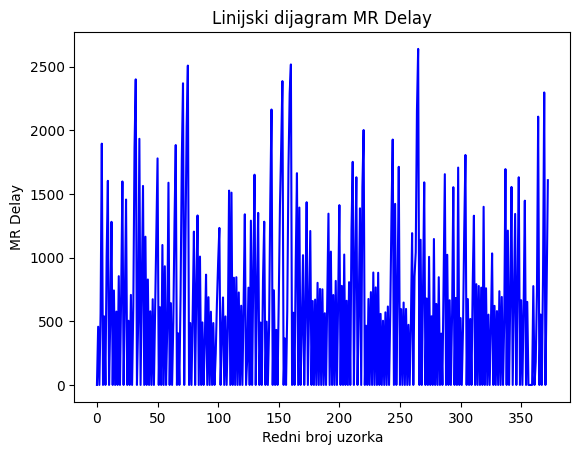

In [30]:
plt.plot(X['MR Delay'], color='blue')
plt.xlabel('Redni broj uzorka')
plt.ylabel('MR Delay')
plt.title('Linijski dijagram MR Delay')
plt.show()

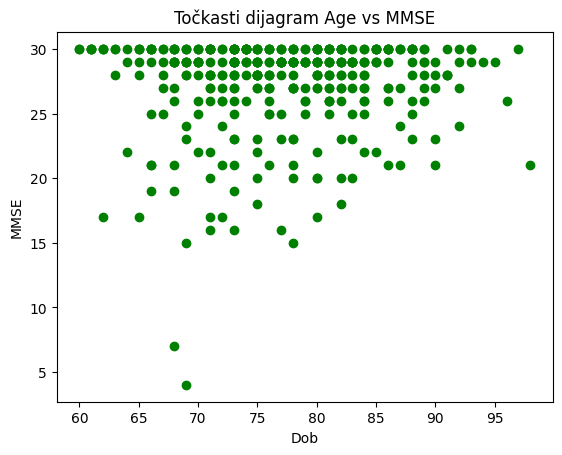

In [31]:
plt.scatter(X['Age'], X['MMSE'], color='green')
plt.xlabel('Dob')
plt.ylabel('MMSE')
plt.title('Točkasti dijagram Age vs MMSE')
plt.show()

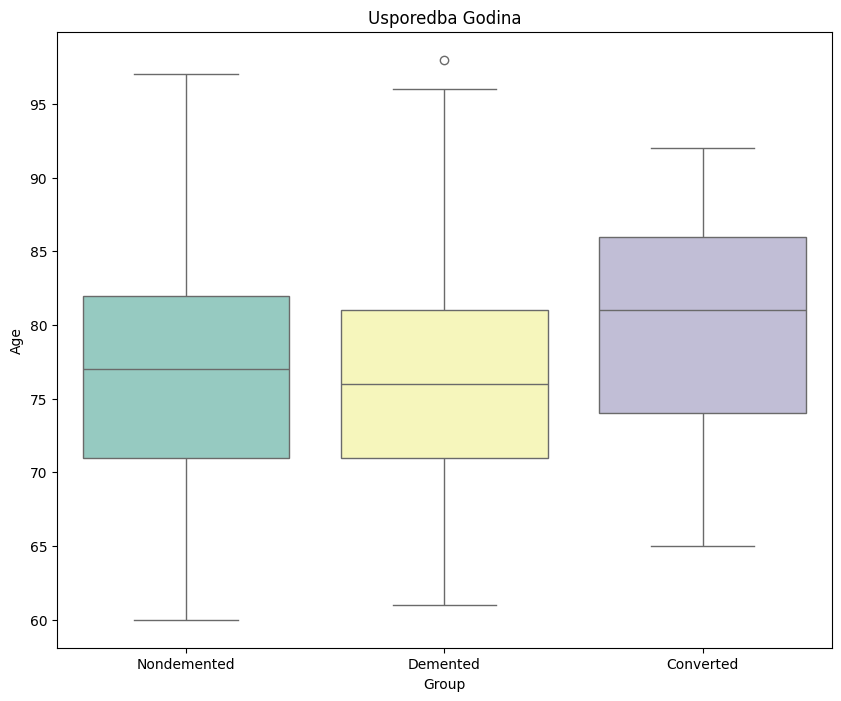

In [32]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Group', y='Age', data=X, palette='Set3')
plt.title('Usporedba Godina')
plt.show()

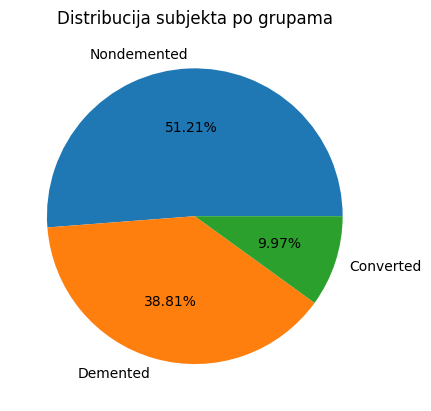

In [33]:
count_per_group = X['Group'].value_counts()
group_names = count_per_group.index

plt.pie(count_per_group, labels=group_names, autopct='%.2f%%')
plt.title('Distribucija subjekta po grupama')
plt.show()


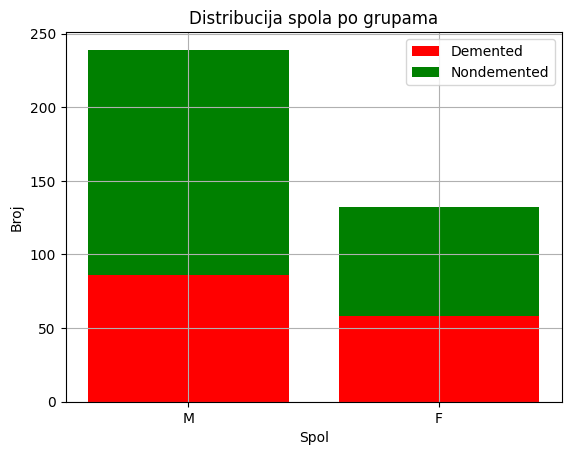

In [34]:
mask_demented = X.Group == 'Demented'

count_per_gender_demented = X.loc[mask_demented, 'M/F'].value_counts()
count_per_gender_nondemented = X.loc[~mask_demented, 'M/F'].value_counts()
gender_names = count_per_gender_demented.index

# plot
plt.bar(gender_names, count_per_gender_demented, color='red', label='Demented')
plt.bar(gender_names, count_per_gender_nondemented, color='green', label='Nondemented', bottom=count_per_gender_demented)
plt.legend(loc='best')
plt.title('Distribucija spola po grupama')
plt.xlabel('Spol')
plt.ylabel('Broj')
plt.grid()
plt.show()



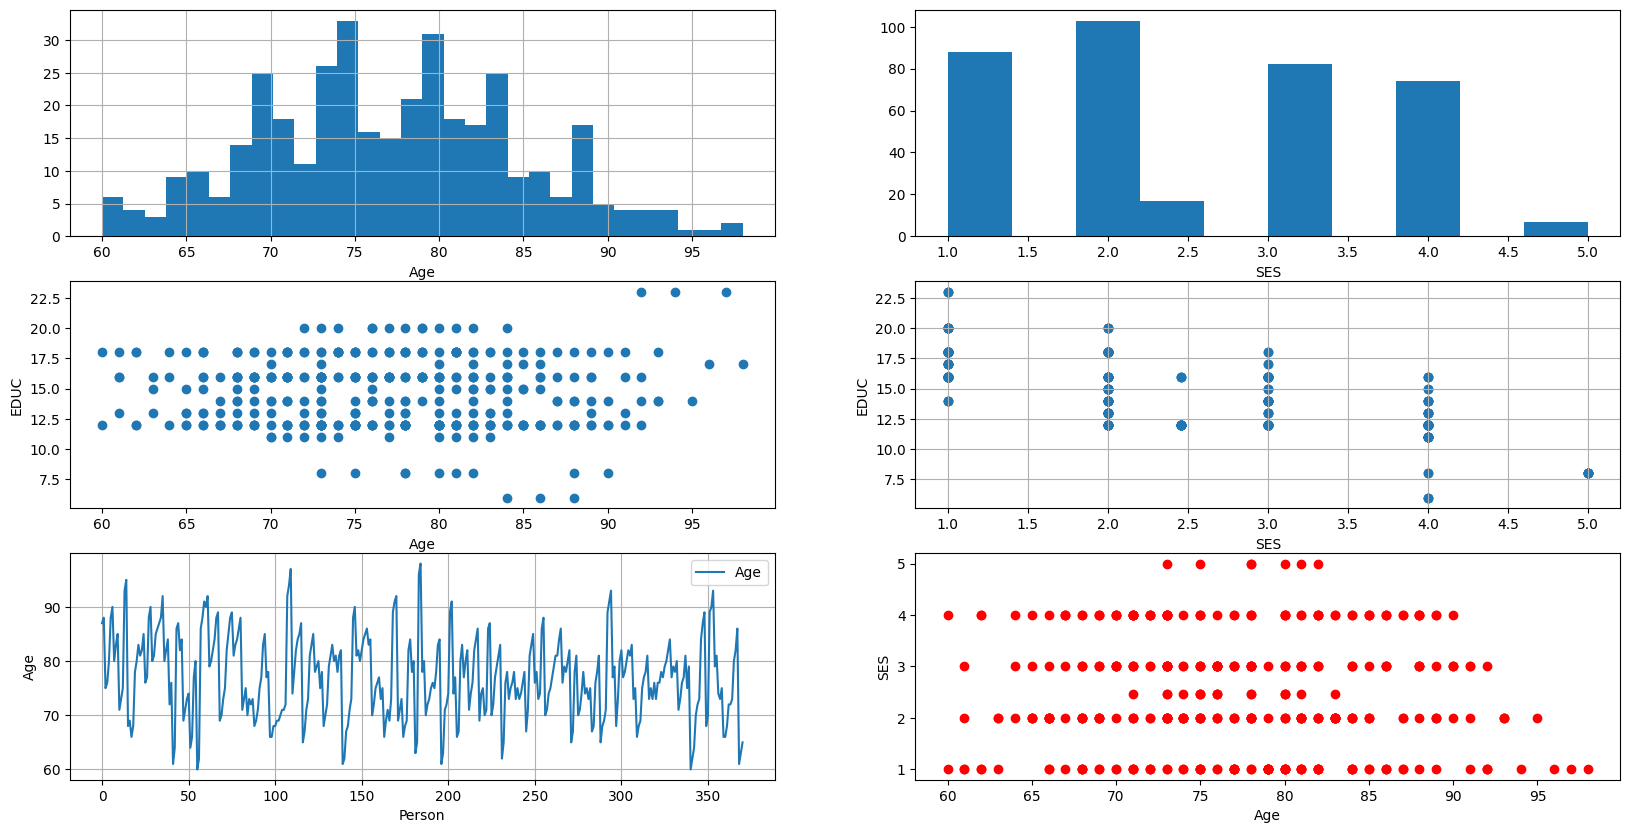

In [35]:
fig, ax = plt.subplots(3, 2, figsize=(20, 10)) 

ax[0, 0].hist(X['Age'], bins=30)
ax[0, 0].grid()
ax[0, 0].set_xlabel('Age')

ax[1, 0].scatter(X['Age'], X['EDUC'])
ax[1, 0].set_xlabel('Age')
ax[1, 0].set_ylabel('EDUC')

ax[2, 0].plot(range(len(X)), X['Age'], label='Age')
ax[2, 0].set_ylabel('Age')
ax[2, 0].set_xlabel('Person')
ax[2, 0].legend(loc='best')
ax[2, 0].grid()

ax[0, 1].hist(X['SES'])
ax[0, 1].set_xlabel('SES')

ax[1, 1].scatter(X['SES'], X['EDUC'])
ax[1, 1].set_xlabel('SES')
ax[1, 1].set_ylabel('EDUC')
ax[1, 1].grid()

ax[2, 1].scatter(X['Age'], X['SES'], color='r')
ax[2, 1].set_xlabel('Age')
ax[2, 1].set_ylabel('SES')

plt.show()


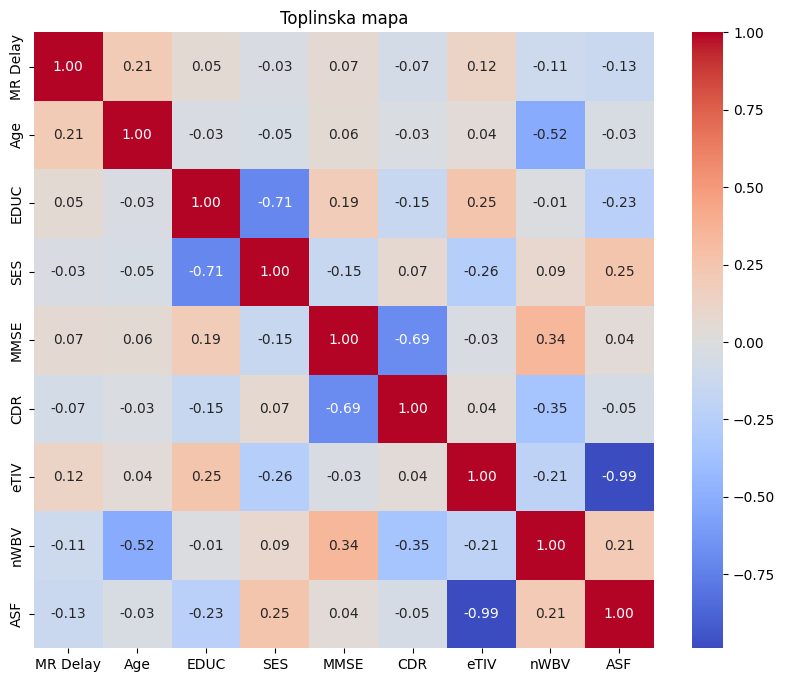

In [36]:
X_numeric = X[['MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]

plt.figure(figsize=(10, 8))
sns.heatmap(X_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Toplinska mapa')
plt.show()
